# Rosenblatt's Online Learning Perceptron
Exercise 2.1.2 - Section 4.

In [83]:
import numpy as np

# Define the dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1],
              [4, 0],
              [4, 1]])
T = np.array([-1, -1, 1, 1, 1, 1])

# Initialize parameters
w = np.array([1, 0, 0])  # Initial weights
eta = 1  # Learning rate

# Augment X with an additional column for the bias term
X_augmented = np.hstack([np.ones((X.shape[0], 1)), X])

# Iteration process
iterations = []  # Store the weights and number of misclassified points for each iteration
for iteration in range(10):  # Iterate for 10 iterations as an example
    num_misclassified = 0
    for n in range(X.shape[0]):
        # Calculate the dot product
        #print("w:", w, f"n={n}")
        #print("X_aug:", X_augmented[n], f"n={n}")
        y_pred = np.dot(w, X_augmented[n])
        #print("y_pred:", y_pred, f"n={n}", "\n")
        # Check if the prediction is incorrect
        if y_pred * T[n] <= 0:
            # Update the weights
            w = w + eta * T[n] * X_augmented[n]
            num_misclassified += 1
    # Store the iteration details
    iterations.append((w.copy(), num_misclassified))
    # Stop if no misclassifications
    if num_misclassified == 0:
        break

iterations  # Display the results of each iteration



[(array([1., 2., 0.]), 4),
 (array([0., 3., 0.]), 3),
 (array([-1.,  3.,  0.]), 1),
 (array([-1.,  3.,  0.]), 0)]

# Perceptron - from scratch

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# plt.ion()

### 0.1 We provide a simple data set. 


First we show how numpy works, building only one of the 2 classes:

The multivariate normal distribution and the univariate normal distribution are both types of normal distributions, but they differ in the number of variables they consider and their applications.

### Univariate Normal Distribution

1. **Definition**: The univariate normal distribution, also known as the Gaussian distribution, is a continuous probability distribution that describes data that clusters around a mean or average. The graph of this distribution is bell-shaped and symmetrical.

2. **Characteristics**:
   - It is defined by two parameters: the mean (μ) and the standard deviation (σ).
   - The mean determines the center of the distribution, and the standard deviation determines the spread or width of the distribution.
   - The probability density function (PDF) of a univariate normal distribution is given by: 
$$ f(x | \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

### Multivariate Normal Distribution

1. **Definition**: The multivariate normal distribution is a generalization of the univariate normal distribution to multiple dimensions. It describes a random vector whose components are jointly normally distributed.

2. **Characteristics**:
   - It is defined by a mean vector (μ) and a covariance matrix (Σ).
   - The mean vector indicates the mean of each component of the vector, while the covariance matrix provides the variance of each component along with the covariance between each pair of components.
   - The probability density function (PDF) for a multivariate normal distribution is more complex than the univariate case and is given by: 
$$ f(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^k |\boldsymbol{\Sigma}|}} e^{-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})} $$

where $k$ is the number of dimensions, $\mathbf{x}$ is a k-dimensional random vector, $\boldsymbol{\mu}$ is the mean vector, and $\boldsymbol{\Sigma}$ is the covariance matrix.

### Key Differences

- **Dimensionality**: The univariate normal distribution deals with a single random variable, whereas the multivariate normal distribution involves multiple correlated random variables.
- **Parameters**: The univariate normal distribution is characterized by a single mean and variance, while the multivariate version involves a mean vector and a covariance matrix.
- **Applications**: The univariate normal distribution is used in situations with a single variable (e.g., height of individuals), while the multivariate normal distribution is applicable in more complex situations involving multiple variables that may be interrelated (e.g., height, weight, and age of individuals).

Understanding these distributions is fundamental in statistics and forms the basis for many statistical methods and analyses in various fields such as finance, engineering, and the natural sciences.

Si estás utilizando $\text{np.random.normal}$ y no estás obteniendo un error a pesar de no proporcionar una matriz de covarianza adecuada, es debido a cómo esta función maneja los argumentos que recibe. La función $\text{np.random.normal}$ es utilizada para generar muestras a partir de distribuciones normales univariadas, pero puede ser aplicada de manera vectorizada a múltiples dimensiones. Veamos cómo está funcionando en tu caso:

1. $mu1 = (1, 1)$: Este es un vector para las medias de tus distribuciones normales. La función $\text{np.random.normal}$ interpretará esto como las medias para dos distribuciones normales univariadas independientes.

2. $sigma1 = ((2, 0.01))$: Aquí es donde se podría esperar un error, ya que esto no es una matriz de covarianza para una distribución normal multivariada. Sin embargo, $\text{np.random.normal}$ no espera una matriz de covarianza, sino desviaciones estándar para distribuciones normales univariadas. Por lo tanto, interpreta $sigma1$ como los valores de desviación estándar para dos distribuciones normales independientes.

3. $\text{X1 = np.random.normal(mu1, sigma1, (100, 2))}$: $np.random.normal$ está generando muestras para cada combinación de los valores dados en $mu1$ y $sigma1. En este caso, produce un array de 100x2, donde cada columna es una muestra de una distribución normal univariada independiente con la media y la desviación estándar especificadas. No estás generando datos de una distribución normal multivariada real con covarianzas entre las variables; en cambio, estás generando dos conjuntos independientes de datos univariados.

En resumen, aunque el código no produce un error, no está haciendo lo que podrías esperar si estuvieras buscando una verdadera distribución normal multivariada. Para generar datos de una distribución normal multivariada de manera correcta, deberías utilizar $\textcolor{green}{np.random.multivariate\_normal}$, que sí requiere una matriz de covarianza adecuada.

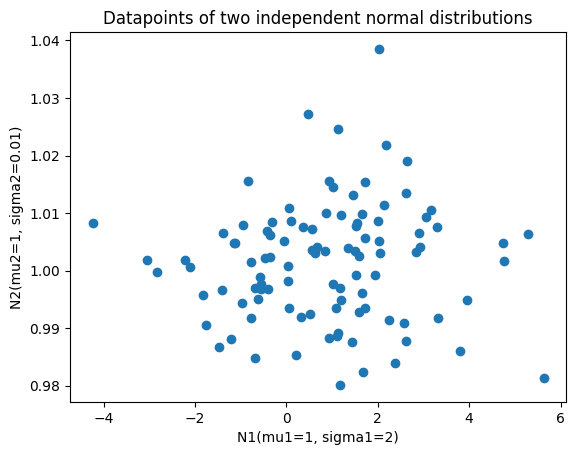

In [85]:
mu1 = [1, 1]
sigma1 = [2, 0.01]

# We generate 100 points which first coordinate corresponds to the first 
# normal distribution ()
X1 = np.random.normal(mu1, sigma1, (100, 2))

# Gráfico de dispersión
plt.scatter(X1[:, 0], X1[:, 1])
plt.title("Datapoints of two independent normal distributions")
plt.xlabel(r"N1(mu1=1, sigma1=2)")
plt.ylabel(r"N2(mu2=1, sigma2=0.01)")
plt.show()

# Histogramas para cada distribución
#plt.hist(X1[:, 0], bins=20, alpha=0.5, label="First distribution (mean=1, std=2)")
#plt.hist(X1[:, 1], bins=20, alpha=0.5, label="Second distribution (mean=1, std=0.01)")
#plt.title("Histograms of the two distributions")
#plt.legend()
#plt.show()


Now we make another blob and stack the two blobs (classes) together

In [86]:
# Data set of combination of 2 datasets by concatenation
N=100
N1=N//4
N2=N-N1
D=2
np.random.seed(42)

# Parameters for the 1st blob of points
mu1=(0.3,0.3)
sigma1=((1, 0.3))
X1 = np.random.normal( mu1, sigma1,(N1,D))
#print(X1.shape)

# Parameters for the 2nd blob of points
mu2=(-1,-1)
sigma2=((2, 0.5))
X2 = np.random.normal( mu2, sigma2,(N2,D))
#print(X2)

# The two blobs are merged, and labels  +1/-1  are assigned
Xraw = np.concatenate( (X1, X2) )
print("Shape X1:", X1.shape,"\nShape X2:", X2.shape,"\nShape Xraw:", Xraw.shape, "\n")
#print(Xraw)
T = np.concatenate( (np.ones(N1), -np.ones(N2)) ) # .reshape(N,1)
print("Ones N1:", np.ones(N1), "Ones N2 shape", np.ones(N1).shape, "\n")
print("Ones N1:", np.ones(N2), "Ones N2 shape", np.ones(N2).shape, "\n")
print("T shape:", T.shape)
X = Xraw.copy() # then X will be the extended vector, with the ones added

Shape X1: (25, 2) 
Shape X2: (75, 2) 
Shape Xraw: (100, 2) 

Ones N1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.] Ones N2 shape (25,) 

Ones N1: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.] Ones N2 shape (75,) 

T shape: (100,)


### 0.2 Preliminary: trick of the ones

It's advised to augment the dataset with ones, "as usual", to account for the bias term in a more elegant and practical way.

In [87]:
# Extended Vector
print("Before agumentation:", X[0:5])
X =  np.hstack((np.ones((N,1)), X))
print("After agumentation:", X[0:5])

Before agumentation: [[ 0.79671415  0.25852071]
 [ 0.94768854  0.75690896]
 [ 0.06584663  0.22975891]
 [ 1.87921282  0.53023042]
 [-0.16947439  0.46276801]]
After agumentation: [[ 1.          0.79671415  0.25852071]
 [ 1.          0.94768854  0.75690896]
 [ 1.          0.06584663  0.22975891]
 [ 1.          1.87921282  0.53023042]
 [ 1.         -0.16947439  0.46276801]]


A simple plot of the 2D data (after adding the 1's)

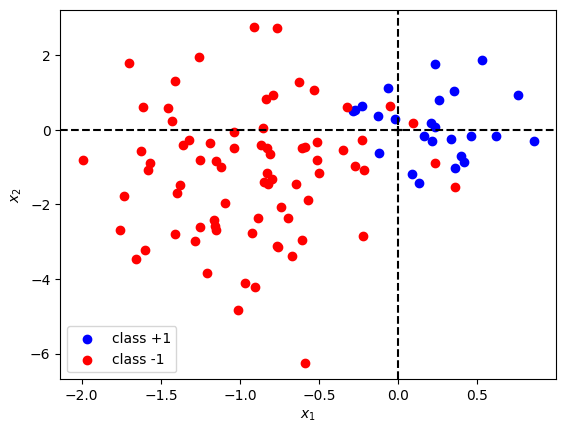

In [88]:
plt.scatter([0,0],[0,0], color='k', marker="+")
plt.axhline(0, ls="--", color='k')
plt.axvline(0, ls="--", color='k')
plt.scatter(X[0:N1,-1], X[0:N1,-2], color='b', label='class +1')
plt.scatter(X[N1:,-1], X[N1:,-2], color='red', label='class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig("2dscatter-K=2classes.svg")

### 0.3 We help you out by providing a nice display function

It plots the data AND the hyperplane

In [89]:
def display(X,T, wparameters, iteration):
    plt.figure(1)
    W1 = X[T==-1,1:] # points of class "-1"
    W2 = X[T== 1,1:] # points of class "+1"

    ## X is assumed to be an extended vector, so 3D for 2D data,
    ## and wparameters must have as many parameters as D+1 (3 here)
    assert(X.shape[1] == wparameters.shape[0])
    
    cmap = cm.jet
    gradient=cmap(np.linspace(0.0,1.0,12))
    w0 = wparameters[0]
    A12 = wparameters[1:3]
    # length of the normal vector (defining the plane)
    norm = np.sqrt((A12**2).sum())
    # computes the closest point to the origin (in the separating plane)
    H = - w0 * A12 / (norm * norm)
    # vector along the separating line / found by rotation / rotation performed by matrix multiplication
    U = np.dot( np.array([[0, 1], [-1, 0]]) , A12) / norm
    # segment around H, of length 10
    D = np.vstack((H + 5*U, H - 5*U))

#     plt.axis([-2, 5, -2, 5])
    plt.plot(W1[:,0], W1[:,1], 'r+') # points of class "-1"
    plt.plot(W2[:,0], W2[:,1], 'bx') # points of class "+1"
    plt.plot(D[:,0], D[:,1], ls='-', color=gradient[iteration%(len(gradient))])
    # ax.set_aspect(1) # to set an aspect ratio of 1, to have a squared box


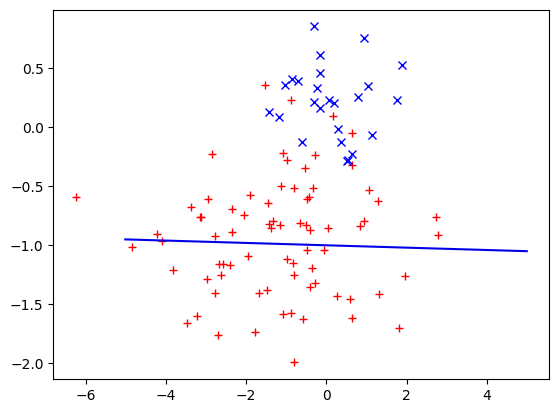

In [90]:
wparameters = np.array([1,0.01,1])
display(X,T, wparameters, 1)

## 1. Initialization

- make a stupid or random guess for an initial value of the parameters vector `wparameters`, i.e set a value for $\vec w_0=$ `w0`, the initial value of $\vec w$
- choose some values for the hyper-parameters `eta`, `MaxIter`


### Initialization of weights

It's independent of the rest, we just need to know the dimensionality of parameters to be initalized

In [91]:
def initializeWeights(X, type):
    ## data dimension
    D = X.shape[1]

    ## choice 1: deterministic
    if type=="zero":
        wparameters = np.zeros((D))
        wparameters[0] = 0.00001

    ## choice 2: uniform random centered in 0
    ##           with appropriate order of magnitude
    elif type=="random":
        wparameters = (np.random.random((D))-0.5)/D**0.5

    return wparameters

[1. 0. 0.]
[-0.0724343   0.26022003  0.13394176]


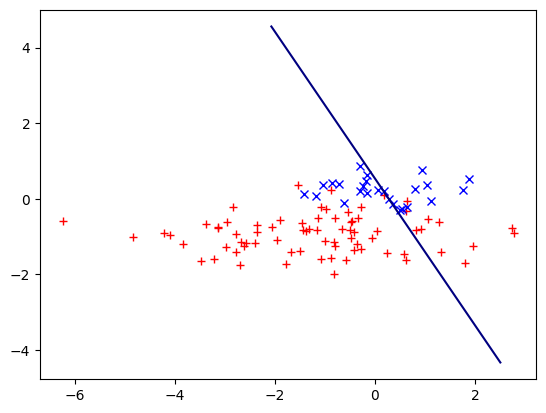

In [92]:
# number of points is obtained dynamically
N = X.shape[0]

######### initialization of the separating vector ######
w0 = initializeWeights(X,"zero")
# Bias in the weight vector
w0[0]=1
print(w0)

## random ##
np.random.seed(42)
w0 = initializeWeights(X,"random")
print(w0)

display(X,T, w0, 0)

In [93]:
### hyper-parameters ###
MAXITER=100
eta = 0.05

### 2.0 Update steps, pen-and-paper

You should have done exercise "Perceptron – classics" by now, so **this should already be done**

Otherwise, **take a piece of paper and a pencil, and derive the update rule for the perceptron**, according to the method of Gradient Descent. Really do it on paper, not on the computer !! 

Note: we start with the perceptron using the *full batch* strategy. Variants include the *Online* strategy, or the *SGD* strategy.



### 2.1 Update steps, coding it 

- implement a function perceptronFullBatch(X,T,eta, w0, maxIter=20, plot=True)
- run it !
- add a print of the number of errors, so as to keep track of train and test error at all iterations of the algorithm (here for now we did not define a validation set, nor a test set)

If you have a hard time with python slices (boolean filters), you can first implement the stupid J2 Loss function (see slides), which has a simpler implementaiton code, because we update for all examples, whether they are corrrectly classified or not.

Test your code on the toy data set, and display your parameters (i.e. display the hyperplane, since we are in 2D)

In [94]:
print("X Shape:", X.shape, ",", "Weights Shape:", wparameters.shape, ",", "Ground Truth Shape:", T.shape)

X Shape: (100, 3) , Weights Shape: (3,) , Ground Truth Shape: (100,)


In [95]:
# a bit of trial-and-error on shapes:
print("Shape after Scalar Product (X @ wparameters):", (((X@ wparameters))).shape)


Shape after Scalar Product (X @ wparameters): (100,)


In [96]:
print("Shape after Scalar Product + Point Wise Product (X @ wparameters)*T:", (((X@ wparameters)*T )).shape)

Shape after Scalar Product + Point Wise Product (X @ wparameters)*T: (100,)


In [97]:
def perceptronFullBatch(X,T,eta, w0, maxIter):
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy
    for iteration in range(maxIter):
        misClassified = ((X @ wparameters)*T  <= 0) ## array of booleans (used as a mask or filter)
        wparameters -= -eta/N * (T[misClassified]@X[misClassified]) 
    return wparameters





In [98]:
wparameters =  perceptronFullBatch(X,T,eta, w0, MAXITER)

In [99]:
## full correction, with monitoring, displays, additional exit criterion, etc
def perceptronFullBatch(X,T,eta, w0, maxIter=20, plot=True, verbose=True, Loss="ReLU"):
    N = X.shape[0]
    D = X.shape[1]
    wparameters = w0.copy()  # deep copy

    ## the algo itself ##
    for iteration in range(maxIter):
        ## we look for misclassified examples ##
        modelValues = X @ wparameters
        XwT = (modelValues)*T          #  This is   (X @ w * T)
        misClassified = (XwT <= 0) ## array of booleans (used as a mask or filter)
        misClassifiedNumber = misClassified.sum()  ## True~1, False~0,so by summing up, we count the True's
        if misClassifiedNumber == 0:
            print("Convergence at iteration", iteration)
            if plot :
                display(X,T, wparameters, iteration)
            print(wparameters)
            return wparameters
        else: ## updating parameters ##

            if Loss=="ReLU":
               #  Rosenblatt style, but full batch:
               wparameters -= -eta/N * (T[misClassified]@X[misClassified]) 
            elif Loss=="stupidJ2":
                # following the ~stupid choice J2 of the slides instead
                wparameters -= eta/N * (modelValues - T) @ X
            else:
                print("You need to choose a Loss function!")
                return wparameters
    
            if verbose:
                print("iteration #",iteration," there are " , misClassifiedNumber, 'misclassified points => new vector', wparameters)
        if plot :
            display(X,T, wparameters, iteration)
    print("No convergence after", maxIter, "iterations.\nThere were misClassifiedNumber*100/N=",misClassifiedNumber/N*100, "% misclassified data points.")
    return wparameters




iteration # 0  there are  25 misclassified points => new vector [-0.0709343   0.2488459   0.14060132]
iteration # 1  there are  25 misclassified points => new vector [-0.0694343   0.23747178  0.14726087]
iteration # 2  there are  26 misclassified points => new vector [-0.0674343   0.22628142  0.15385671]
iteration # 3  there are  25 misclassified points => new vector [-0.0649343   0.21550646  0.16003473]
iteration # 4  there are  24 misclassified points => new vector [-0.0619343   0.20579539  0.1649358 ]
iteration # 5  there are  22 misclassified points => new vector [-0.0589343   0.19662801  0.16913149]
iteration # 6  there are  22 misclassified points => new vector [-0.0559343   0.18746063  0.17332718]
iteration # 7  there are  22 misclassified points => new vector [-0.0519343   0.17946702  0.17653541]
iteration # 8  there are  21 misclassified points => new vector [-0.0484343   0.17144049  0.17962877]
iteration # 9  there are  20 misclassified points => new vector [-0.0454343   0.16

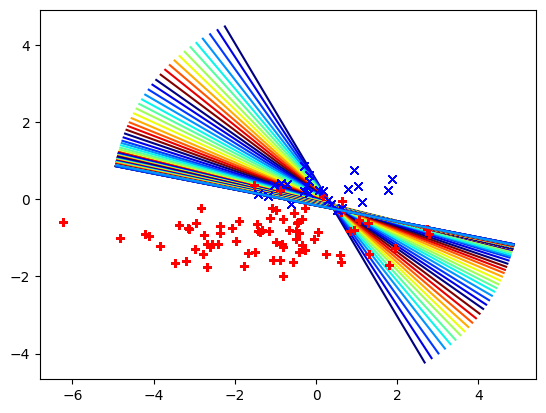

In [100]:
plotting = True
verbose = True
wparameters =  perceptronFullBatch(X,T,eta, w0, MAXITER, plotting, verbose)

### 2.2 Testing on more realistic data: MNIST (restricted to 2 classes)

Test your code on the following data set. You should be able to fully fit the train set.

Question: can you still picture the hyperplane ? Remember that we have many dimensions, but that the data consists in images.

In [101]:
## MNIST, reduced in quality (8x8 pixels pictures) ##
K=2
import sklearn.datasets
Xmnist,Tmnist = sklearn.datasets.load_digits(n_class=K, return_X_y=True)

In [102]:
Xmnist.shape, Tmnist.shape

((360, 64), (360,))

#### We show a couple of pictures and their labels

0
1
0
1
0
1
0
0
1
1


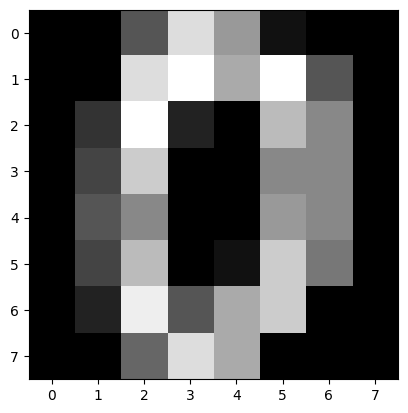

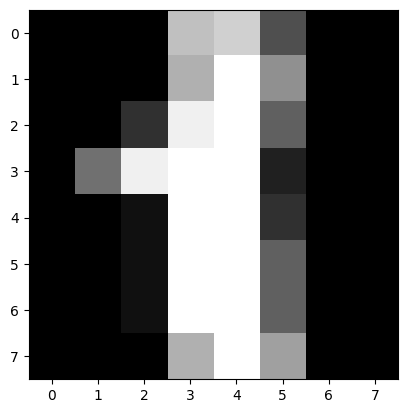

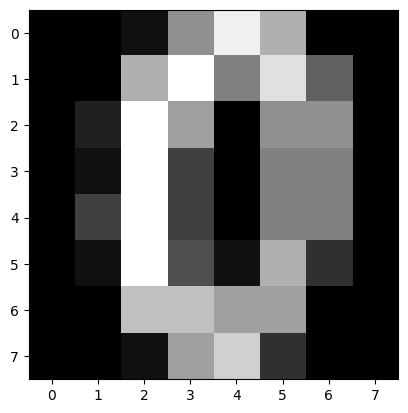

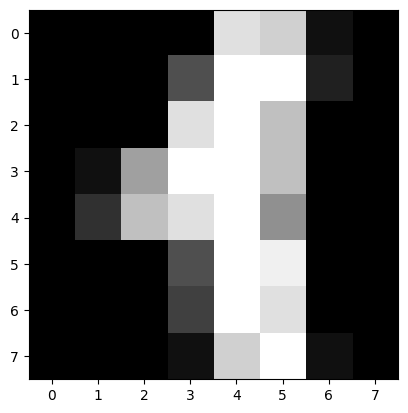

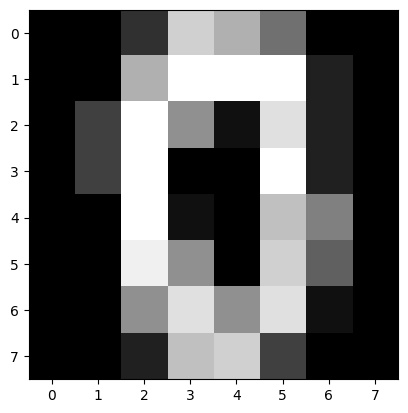

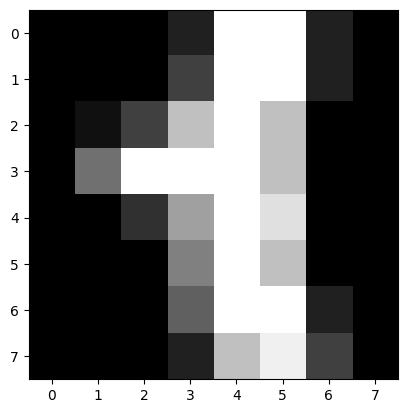

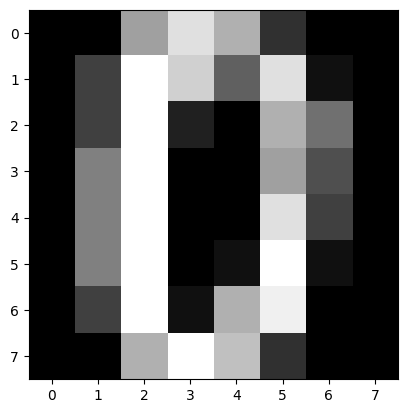

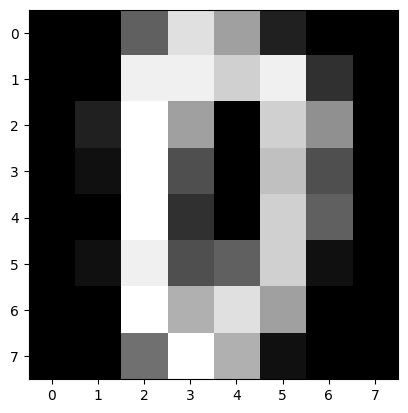

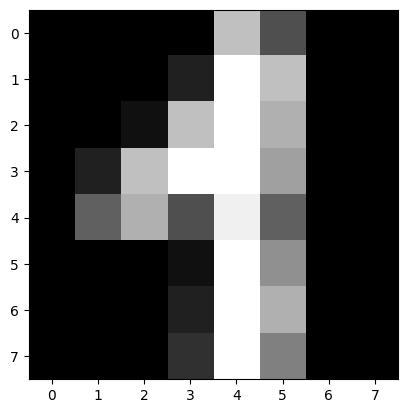

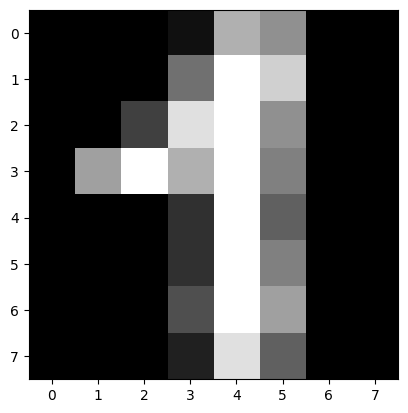

In [103]:
for n in range(10):
    plt.figure()
    plt.imshow(Xmnist[n].reshape(8, 8) , cm.gray)
    print(Tmnist[n])

#### Note that the labels are encoded as 0, 1 and not -1, 1. Is that a problem ?

In [104]:
Tmnist[:5]

array([0, 1, 0, 1, 0])

In [105]:
## TODO : do something about it !?

In [106]:
Tmnist[:5]

array([0, 1, 0, 1, 0])

In [107]:
np.random.seed(42)
w0mnist = initializeWeights(Xmnist,"random")

iteration # 0  there are  238 misclassified points => new vector [-0.01568249  0.05633929  0.0298048   0.01691564 -0.02402545 -0.0223618
 -0.05073955  0.04577202  0.01263938  0.02606463 -0.05695472  0.0729054
  0.06730533 -0.01104094 -0.03441077 -0.03957444 -0.02446972  0.00595567
  0.00452091 -0.00281858  0.03956495 -0.02161882 -0.02262081 -0.01670477
 -0.00549125  0.04209144 -0.01854078  0.02222375  0.0348296  -0.03441592
  0.01524866 -0.04118448 -0.05436855  0.05899958  0.06834289  0.04991078
 -0.00172883 -0.03004099  0.02483468 -0.00748094 -0.04724522  0.00014711
 -0.05420143  0.05933172 -0.00745806  0.03978751 -0.02189723  0.0025085
  0.00583878 -0.03928208  0.06086475  0.04175271  0.07754848  0.06999231
  0.01540416  0.05273428 -0.05143844 -0.03797436 -0.05579103 -0.01719482
  0.00561244 -0.00877582  0.04439774 -0.01790583]
iteration # 1  there are  178 misclassified points => new vector [-0.01568249  0.05633929  0.0298048   0.01691564 -0.02402545 -0.0223618
 -0.05073955  0.04577

iteration # 88  there are  178 misclassified points => new vector [-0.01568249  0.05633929  0.0298048   0.01691564 -0.02402545 -0.0223618
 -0.05073955  0.04577202  0.01263938  0.02606463 -0.05695472  0.0729054
  0.06730533 -0.01104094 -0.03441077 -0.03957444 -0.02446972  0.00595567
  0.00452091 -0.00281858  0.03956495 -0.02161882 -0.02262081 -0.01670477
 -0.00549125  0.04209144 -0.01854078  0.02222375  0.0348296  -0.03441592
  0.01524866 -0.04118448 -0.05436855  0.05899958  0.06834289  0.04991078
 -0.00172883 -0.03004099  0.02483468 -0.00748094 -0.04724522  0.00014711
 -0.05420143  0.05933172 -0.00745806  0.03978751 -0.02189723  0.0025085
  0.00583878 -0.03928208  0.06086475  0.04175271  0.07754848  0.06999231
  0.01540416  0.05273428 -0.05143844 -0.03797436 -0.05579103 -0.01719482
  0.00561244 -0.00877582  0.04439774 -0.01790583]
iteration # 89  there are  178 misclassified points => new vector [-0.01568249  0.05633929  0.0298048   0.01691564 -0.02402545 -0.0223618
 -0.05073955  0.045

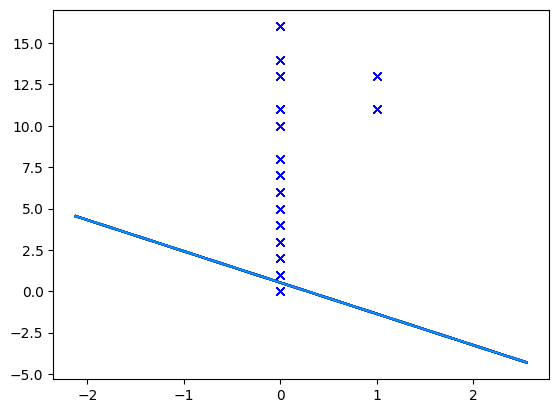

In [108]:
eta=0.01
MAXITER=100
wparameters =  perceptronFullBatch(Xmnist,Tmnist,eta, w0mnist, MAXITER)

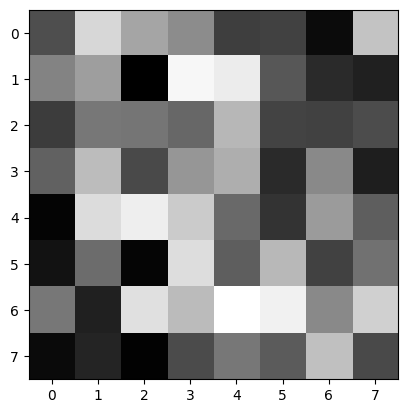

In [109]:
plt.imshow(wparameters.reshape(8, 8) , cm.gray)

### 3.1 Bonus / Homework: Re-code your algo, putting it inside a class

The class should contain an `__init__` method, a `fit` method and a `predict` method, at least. It may also include a `score` method 

### 3.2 Bonus / Homework: Compare the evolution of the hyperplane in the Online and Full-Batch strategies, on the following data set: 
- for this data set (and maybe also the one at the beggining of the TP), get an intuitive feeling of how the plane evolves over iterations, for the online perceptron and for the full batch perceptron
- which algo seems the most efficient ? (Try several initializations of $\vec w_0$).

#### Note: 
this is the data set used in exercise "2.1.2 Roseblatt’s online Perceptron"

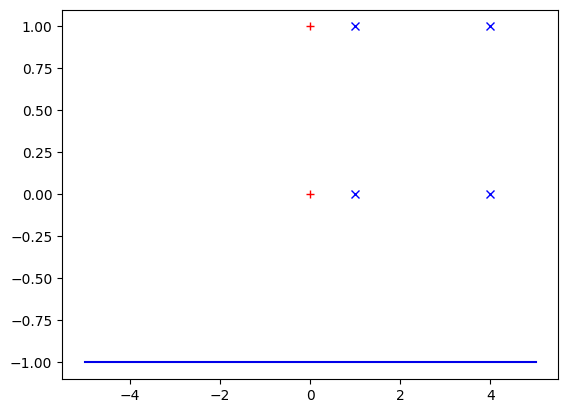

In [110]:
## data set 1
Xtoy = np.array([ [0, 0], [0, 1], [1, 0], [1, 1], [4, 0], [4, 1] ])
Ttoy = np.array([ -1 , -1 , 1 , 1 , 1 ,1])
N = Xtoy.shape[0]
Xtoy =  np.hstack((np.ones((N,1)), Xtoy))  # extended vector
wparameters_toy = np.array([1, 0.00, 1])
display(Xtoy,Ttoy, wparameters_toy, 1)

iteration # 0  there are  2 misclassified points => new vector [0.93333333 0.         0.96666667]
iteration # 1  there are  2 misclassified points => new vector [0.86666667 0.         0.93333333]
iteration # 2  there are  2 misclassified points => new vector [0.8 0.  0.9]
iteration # 3  there are  2 misclassified points => new vector [0.73333333 0.         0.86666667]
iteration # 4  there are  2 misclassified points => new vector [0.66666667 0.         0.83333333]
iteration # 5  there are  2 misclassified points => new vector [0.6 0.  0.8]
iteration # 6  there are  2 misclassified points => new vector [0.53333333 0.         0.76666667]
iteration # 7  there are  2 misclassified points => new vector [0.46666667 0.         0.73333333]
iteration # 8  there are  2 misclassified points => new vector [0.4 0.  0.7]
iteration # 9  there are  2 misclassified points => new vector [0.33333333 0.         0.66666667]
iteration # 10  there are  2 misclassified points => new vector [0.26666667 0.     

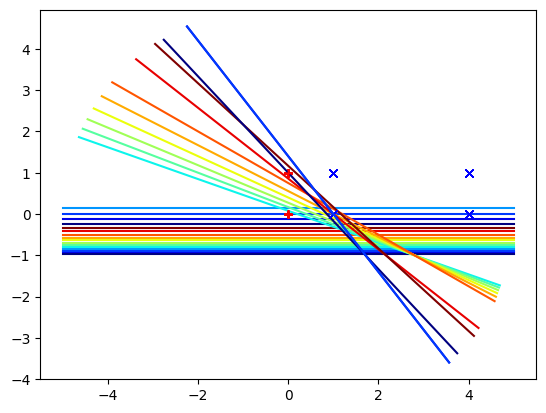

In [111]:
plotting = True
eta=0.2
MAXITER=30
wparameters =  perceptronFullBatch(Xtoy,Ttoy,eta, wparameters_toy, MAXITER)

In [112]:
def perceptronOnline(X,y,eta, w0, maxIter=20, plot=True):
    # sets the number of points
    N = X.shape[0]

    wparameters=w0.copy()   # deep copy
    ## the algo itself
    for iteration in range(maxIter):
    
        ## TODO
        ??
        
    return wparameters

In [113]:
plotting = True
eta=0.2
MAXITER=30
wparameters =  perceptronOnline(Xtoy,Ttoy,eta, wparameters_toy, MAXITER)


IPython -- An enhanced Interactive Python

IPython offers a fully compatible replacement for the standard Python
interpreter, with convenient shell features, special commands, command
history mechanism and output results caching.

At your system command line, type 'ipython -h' to see the command line
options available. This document only describes interactive features.

GETTING HELP
------------

Within IPython you have various way to access help:

  ?         -> Introduction and overview of IPython's features (this screen).
  object?   -> Details about 'object'.
  object??  -> More detailed, verbose information about 'object'.
  %quickref -> Quick reference of all IPython specific syntax and magics.
  help      -> Access Python's own help system.

If you are in terminal IPython you can quit this screen by pressing `q`.


MAIN FEATURES
-------------

* Access to the standard Python help with object docstrings and the Python
  manuals. Simply type 'help' (no quotes) to invoke it.

* Ma

### 3.3 Bonus / Homework: use sklearn to check your codes

In [114]:
import sklearn ## this line should run, at home (check it)